In [2]:
import cv2
import matplotlib.pyplot as plt

# **QR Code detector**


In [3]:
image = cv2.imread('images/test.png')
cv2.imshow('qr',image)
detector = cv2.QRCodeDetector()
#detectAndDecode -> decoded
def detect_qr(img):
    data,points,qr_code = detector.detectAndDecode(img)
    if points is not None:
        print('QR Code has been detected successfully\n')
        print(f'decoded content of QR Code:\t{data}')
        pts =points[0].astype('int')
        fig,ax = plt.subplots(1,3,figsize=(30,10))
        ax[0].imshow(img)
        ax[0].set_title('original')
        cv2.imwrite('images/cropped_qr.png',qr_code)
        for i in range(len(pts)):
            j = (i+1)%4
            img = cv2.line(img,tuple(pts[i]),tuple(pts[j]),(0,0,255),5)
    
        ax[1].imshow(img)
        ax[1].set_title('detected and annotated')
        ax[2].imshow(qr_code,cmap='gray')
        ax[2].set_title('QR code')

       
        


QR Code has been detected successfully

decoded content of QR Code:	TechTutorialsX!


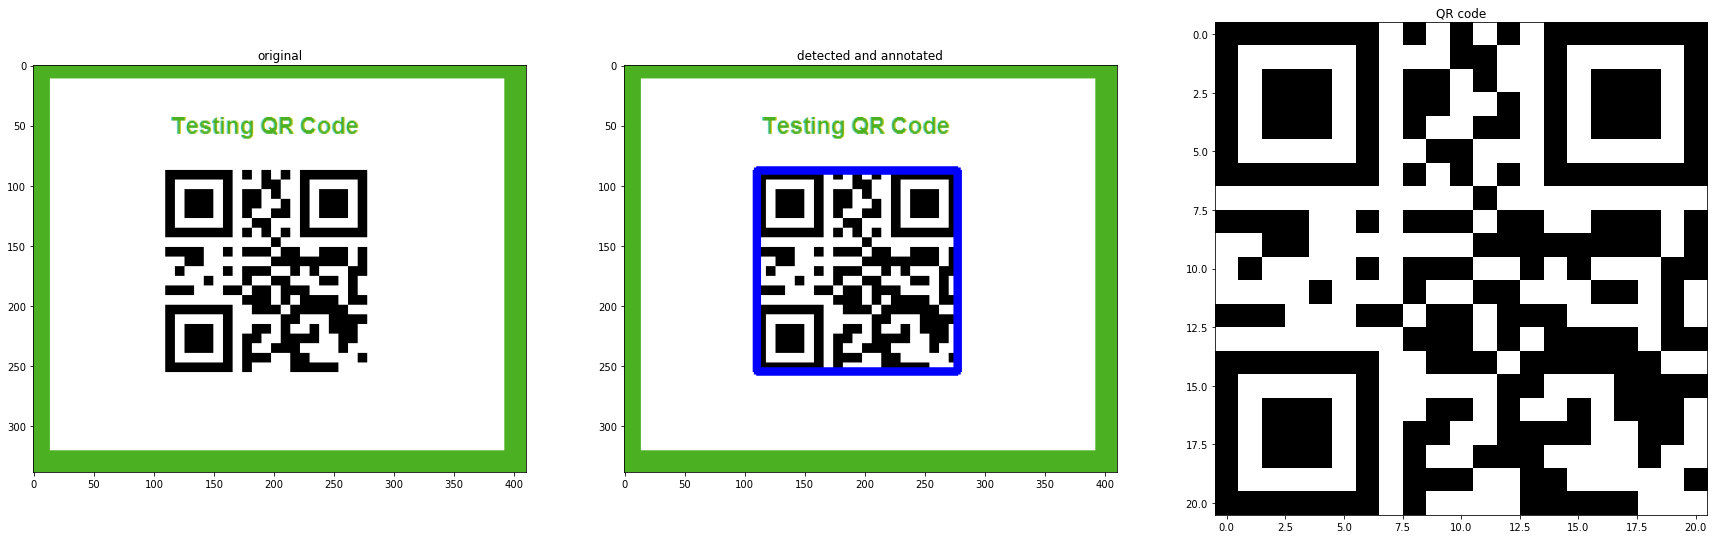

In [4]:
detect_qr(image)

## **Meme creator** 

In [28]:
def multiLineText(text,img_w,font,scale,thickness,margin):
    """
    gets text,image width, scale of font,thickness of font and margin for the text,
    and return -> list of str (text) if short, else list of word lines( list(str) ) made by splitting long text
    """
    
    (w,h),_ = cv2.getTextSize(text,font,scale,thickness)
    # one character size, ll use it for whitespacing
    one = w/len(text) 
    # one line of text space (taking into account predefined margin)
    space = img_w - 2 * margin
    txt = []
    #if text fits in single line
    if w<= space:
        txt.append(text)

    #if text cant fit into single line
    else:
        words = text.split()
        check = 0
        i=0
        j=0
        #creates line, by iteratively checking cumsum of width of words
        while i <= len(words)-1:
            word = words[i]
            #calculates width of a word in the text 
            (w1,_),_ = cv2.getTextSize(word,font,scale,thickness)
            #width = word_width + one white space width
            check += (w1+one)
            if not check <= space:
                #merges list of words into single line
                txt.append(' '.join( element for element in words[j:i]))
                j=i
                check=0
                #checks if width of left part fits into single line
                parts_left = ' '.join(el for el in words[i:])
                (part_w,part_h),_ = cv2.getTextSize(parts_left,font,scale,thickness)
                if part_w <= space:
                    txt.append(parts_left)
                    break
            else:
                i+=1
    return txt


def meme_create(img,text,font,scale,thickness,margin,top_margin):
    image = cv2.imread(img)
    #mulitline creator
    img_h,img_w,_ = image.shape
    txt = multiLineText(text,img_w,font,scale,thickness,margin)

    y = top_margin
    #drawing text
    for line in txt:

        (line_w,line_h),_ = cv2.getTextSize(line,font,scale,thickness)
        centred_row = int((img_w - line_w)/2)
        y += 1.4*line_h
        image = cv2.putText(image,line,(centred_row,int(y)),font,scale,(0,0,0),thickness=thickness)
        image = cv2.putText(image,line,(centred_row,int(y)),font,scale,(255,255,255),thickness=thickness-7)

    #putting the text
    cv2.imshow('meme',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)  


In [29]:
font = cv2.FONT_HERSHEY_COMPLEX
scale = 2
thickness = 10
margin = 30
top_margin = 20
text = 'You, when somebody tries to train CNN model with 300k images in his local machine'
meme_create('images/meme.jpeg',text,font,scale,thickness,margin,top_margin)

    

# **Annotation**

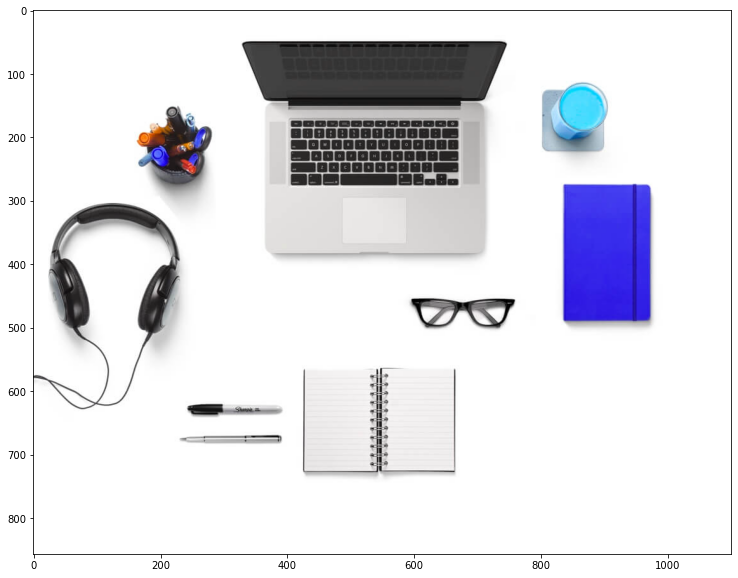

In [32]:
image = cv2.imread('images/desk-objects.jpeg')
plt.figure(figsize=(15,10))
plt.imshow(image)

In [127]:
objs = [['Laptop',(320,30),(750,400),(120,123,100)],
        ['Notebook',(420,550),(690,740),(0,0,255)],
        ['Headphone',(20,290),(240,630),(100,0,255)],
        ['Glasses',(580,450),(760,510),(0,140,255)]]

def annotate(img,objects):
    font = cv2.FONT_HERSHEY_COMPLEX
    f_scale = 0.5
    f_thick = 2
    image = cv2.imread('images/desk-objects.jpeg')
    fig,ax = plt.subplots(2,figsize=(20,20))
    ax[0].imshow(image)
    ax[0].set_title('original')
    for item in objects:
        label,p1,p2,color = item
        #draws the box around object
        b_thick = 4
        image = cv2.rectangle(image,p1,p2,color,b_thick)

        #calcs width ,height and baseline 
        (w,h),baseline= cv2.getTextSize(label,font,f_scale,f_thick)
        #draws box for text
        v_margin = 10
        h_margin = 20
        x1 = p1[0]
        y1 = p1[1] - (h + b_thick + v_margin) # difference is text height,box line thickness and margin we want between text and textbox
        x2 = p1[0] + h_margin + w
        y2 = p1[1] # difference is the height of text and margin
        image = cv2.rectangle(image,(x1,y1),(x2,y2),color,-1)
        image = cv2.putText(image,label,(int(p1[0]+h_margin/2),p1[1]-(baseline+b_thick)),font,0.5,(0,0,0))
    ax[1].imshow(image)
    ax[1].set_title('annotated')


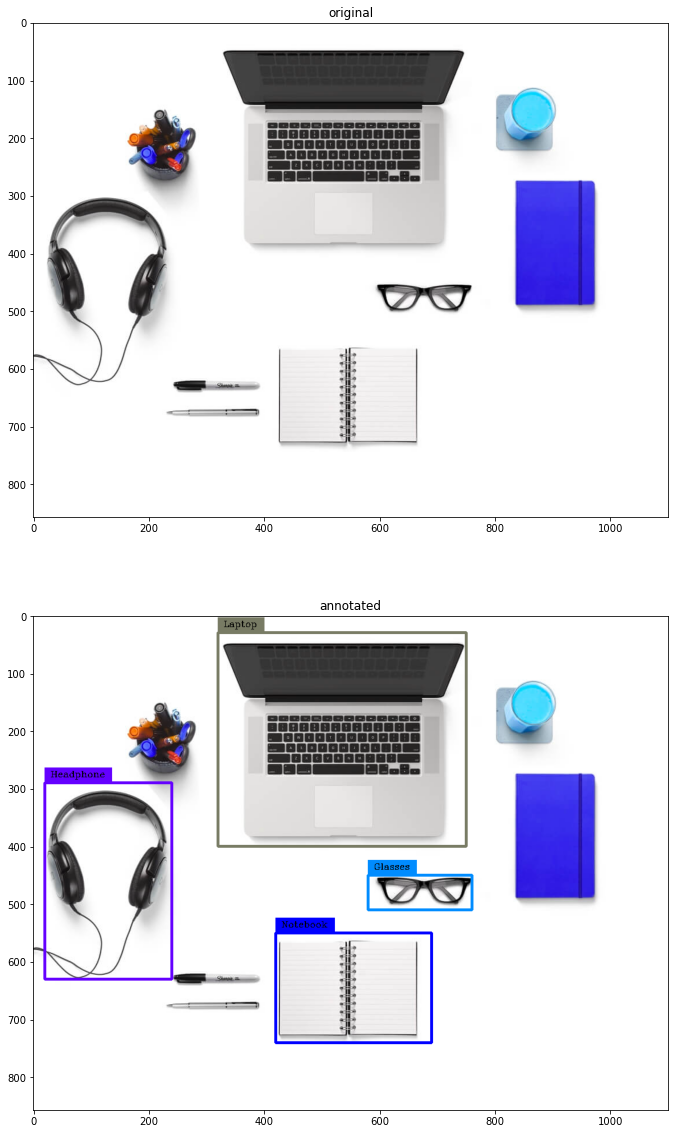

In [128]:
annotate('images/desk-objects.jpeg',objs)